In [176]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
import pickle as pickle
import gzip as gzip
import matplotlib.pyplot as plt

In [177]:
def load_data():
    f = gzip.open("mnist.pkl.gz", 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="bytes")
    return training_data, validation_data, test_data

In [178]:
training_data, validation_data, test_data = load_data()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [179]:
x_train = torch.FloatTensor(training_data[0])
y_train = torch.LongTensor(training_data[1])
x_test = torch.FloatTensor(test_data[0])
y_test = torch.LongTensor(test_data[1])

In [180]:
class Model(nn.Module):
    def __init__(self, ip_size, hidden_size, op_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(ip_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, op_size)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [181]:
input_size = 784
output_size = 10
hidden_size = 200
learning_rate = 0.001
epochs = 100

In [182]:
model = Model(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [183]:
def check_accuracy(check_x, check_y, model):
    correct = 0
    samples = 0
    model.eval()
    with torch.no_grad():
        x = check_x.to(device=device)
        y = check_y.to(device=device)
        y_pred = model(x)
        _, y_pre_indices = torch.max(y_pred,dim=1)
        # tensor1 == tensor2 returns a tensor of bool with element by element checking
        correct_tensor = (y_pre_indices == y)
        correct += torch.sum(correct_tensor).item() # torch.sum() returns a tensor of sum of input
        samples += y_pre_indices.size(0)
        accuracy = round((correct/samples) * 100,4)
        print(f'Accuracy is {correct} / {samples} = {accuracy}')
    model.train()

In [184]:
losses = []

for epoch in range(epochs):

    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f'Epoch: {epoch+1} and Loss: {loss.item():.4f} ')
        check_accuracy(x_test,y_test,model)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1 and Loss: 2.3034 
Accuracy is 1173 / 10000 = 11.73
Epoch: 11 and Loss: 1.4727 
Accuracy is 7895 / 10000 = 78.95
Epoch: 21 and Loss: 0.8278 
Accuracy is 8487 / 10000 = 84.87
Epoch: 31 and Loss: 0.5433 
Accuracy is 8747 / 10000 = 87.47
Epoch: 41 and Loss: 0.4277 
Accuracy is 8923 / 10000 = 89.23
Epoch: 51 and Loss: 0.3701 
Accuracy is 9046 / 10000 = 90.46
Epoch: 61 and Loss: 0.3357 
Accuracy is 9123 / 10000 = 91.23
Epoch: 71 and Loss: 0.3121 
Accuracy is 9166 / 10000 = 91.66
Epoch: 81 and Loss: 0.2939 
Accuracy is 9204 / 10000 = 92.04
Epoch: 91 and Loss: 0.2786 
Accuracy is 9240 / 10000 = 92.4


Text(0.5, 0, 'epoch')

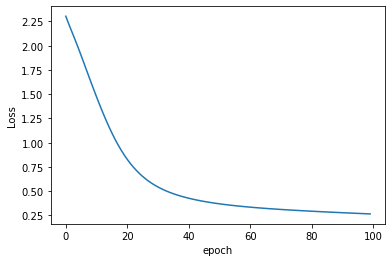

In [185]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')